# Implementing linear regression in Python

Like many data analysis problems, there are a number of different ways to perform a linear regression in Python. This notebook shows a few different methods. The final method motivates a review of matrix multiplication, which will be helpful in the next section on multivariate regression.

## Example: 2007 West Coast Ocean Acidification Cruise 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import pingouin as pg

import PyCO2SYS as pyco2

## Load data

##### Load 2007 data

In [2]:
filename07 = 'data/wcoa_cruise_2007/32WC20070511.exc.csv'
df07 = pd.read_csv(filename07,header=29,na_values=-999,parse_dates=[[6,7]])

In [3]:
df07.keys()

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'SAMPNO', 'LINE', 'STNNBR',
       'CASTNO', 'LATITUDE', 'LONGITUDE', 'BOT_DEPTH', 'BTLNBR',
       'BTLNBR_FLAG_W', 'CTDPRS', 'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W', 'OXYGEN',
       'OXYGEN_FLAG_W', 'SILCAT', 'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W',
       'NITRIT', 'NITRIT_FLAG_W', 'PHSPHT', 'PHSPHT_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W'],
      dtype='object')

## Linear regression: five methods in Python

Create $x$ and $y$ variables.

In [4]:
x = df07['PHSPHT']
y = df07['NITRAT']

Plot data.

Text(0, 0.5, 'nitrate')

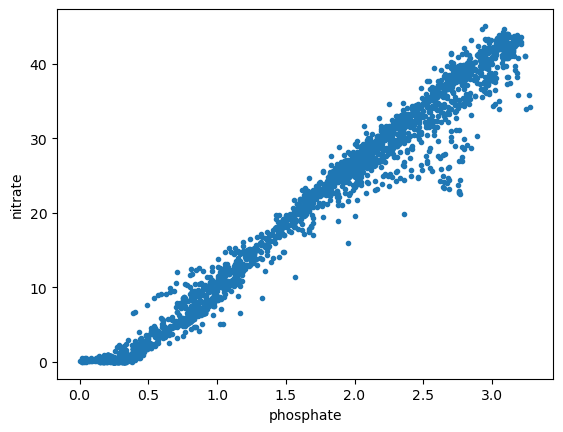

In [5]:
plt.figure()
plt.plot(x,y,'.')
plt.xlabel('phosphate')
plt.ylabel('nitrate')

Create a subset where both variables have finite values.

In [6]:
ii = np.isfinite(x+y)

In [7]:
ii

0       True
1       True
2       True
3       True
4       True
        ... 
2343    True
2344    True
2345    True
2346    True
2347    True
Length: 2348, dtype: bool

### Method 1: Scipy

In [8]:
result = stats.linregress(x[ii],y[ii])

In [9]:
result

LinregressResult(slope=14.740034517902119, intercept=-3.9325720551998167, rvalue=0.9860645445968044, pvalue=0.0, stderr=0.052923783569700955, intercept_stderr=0.10258209230911229)

In [10]:
result.slope

14.740034517902119

Exercise: Draw the regression line with the data

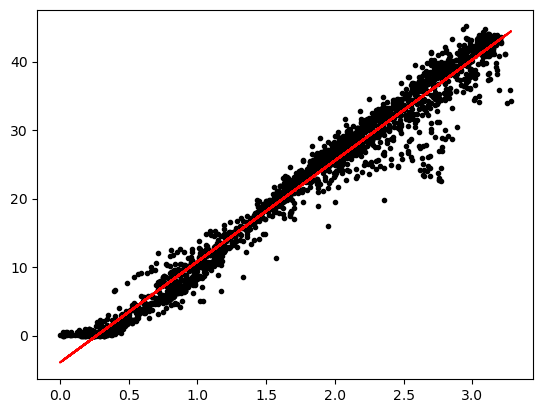

In [11]:
plt.figure()
plt.plot(x,y,'k.')
plt.plot(x,result.slope*x+result.intercept,'r-')

### Method 2: statsmodels

Ordinary least squares fit using [statsmodels](https://www.statsmodels.org/).

In [12]:
smres = smf.ols('NITRAT ~ PHSPHT',df07).fit()

In [13]:
smres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NITRAT   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 7.757e+04
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:28:16   Log-Likelihood:                -4993.9
No. Observations:                2210   AIC:                             9992.
Df Residuals:                    2208   BIC:                         1.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9326      0.103    -38.336      0.000      -4.134      -3.731
PHSPHT        14.7400      0.053    278.514      0.000      14.636      14.844
==============================================================================
Omnibus:                      874.728   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5147.310
Skew:                          -1.766   Prob(JB):                         0.00
Kurtosis:                       9.589   Cond. No.                         4.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Method 3: pingouin

In [14]:
pg.linear_regression(x[ii],y[ii])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-3.932572,0.102582,-38.335853,6.540950e-247,0.972323,0.972311,-4.133740,-3.731405
1,PHSPHT,14.740035,0.052924,278.514375,0.000000e+00,0.972323,0.972311,14.636249,14.843820


### Method 4: Regression coefficients using numpy's polyfit function
We can also use the `polyfit` function from numpy to calculate the coefficients of the line of best fit (minimizing the sum of square errors): 

In [15]:
coefficients = np.polyfit(x[ii],y[ii],1)
print(coefficients)

[14.74003452 -3.93257206]


### Method 5: Matrix form

In the next section, we'll consider solving for the coefficients of the linear fit using matrices. But first, let's do a quick review of matrix multiplication:

#### Review: Matrix Multiplication
Suppose we have the following matrices:
$$ \textbf{A}= \begin{bmatrix} 1 & 2 & 3\\ 4 & 5 & 6 \end{bmatrix} \text{ and } \textbf{B} = \begin{bmatrix} 7 & 8\\ 9 & 10 \\ 11 & 12 \end{bmatrix}$$
What will be the matrix product $\textbf{AB}$?

To define matrices in Python, we define 2-d arrays as lists of lists wrapped in numpy's ```array``` function, for example:

In [16]:
# define matrix A
A = np.array([[1, 2, 3], 
              [4, 5, 6]])

# define matrix B 
B = np.array([[7, 8], 
              [9, 10], 
              [11, 12]])

We can check the dimensions of these array's using numpy's ```shape``` function:

In [17]:
print('shape of A: ', np.shape(A))
print('shape of B: ', np.shape(B))

shape of A:  (2, 3)
shape of B:  (3, 2)


Finally, we can multiply two arrays using numpy's ```dot``` function:

In [18]:
np.dot(A,B)

array([[ 58,  64],
       [139, 154]])

#### Review: Matrix Transpose

The *transpose* of a matrix $\textbf{A}^T$ has the same values as $\textbf{A}$, but the rows are converted to columns. One way to do this is with the `np.transpose` function.

In [19]:
print(A)

[[1 2 3]
 [4 5 6]]


In [20]:
print(np.transpose(A))

[[1 4]
 [2 5]
 [3 6]]


Another way is to use the `.T` method on a Numpy array.

In [21]:
print(A.T)

[[1 4]
 [2 5]
 [3 6]]


Note that the product $\textbf{A}^T\textbf{A}$ is a *square* matrix, which has the same number of rows and columns. 

In [22]:
np.dot(A.T, A)

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

#### Review: Matrix Inverse

The concept of a matrix inverse is similar to the matrix of a single number. If we have a single value $b$, its inverse can be represented as $b^{-1}$. A value times its inverse is equal to 1.

$$b^{-1}b = 1$$

Let's say we have a *square* matrix $\textbf{B}$ where the number of rows and columns are equal. The inverse $\textbf{B}^{-1}$ is the matrix that gives 

$$ \textbf{B}^{-1}\textbf{B} = \textbf{I} $$

where the *identity matrix* $\textbf{I}$ is a matrix that has all 0 values, except for 1 values along the diagonal from the upper left to the lower right. For example, a 3x3 identity matrix would be

$$ \textbf{I} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0  & 1  \end{bmatrix} $$

In a linear algebra class, you might calculate $\textbf{B}^{-1}$ by hand, but in this class we will rely in Numpy to do it for us. Let's set up a $3 \times 3$ $\textbf{B}$ matrix.

In [23]:
B = np.array([[1, 2, 1],
              [3, 2, 1],
              [1, 2, 2]])
print(B)

[[1 2 1]
 [3 2 1]
 [1 2 2]]


The inverse $\textbf{B}^{-1}$ is

In [24]:
np.linalg.inv(B)

array([[-0.5 ,  0.5 ,  0.  ],
       [ 1.25, -0.25, -0.5 ],
       [-1.  ,  0.  ,  1.  ]])

The product $\textbf{B}^{-1}\textbf{B}$ can be calculated as

In [25]:
BinvB = np.dot(np.linalg.inv(B), B)
print(BinvB)

[[ 1.00000000e+00  3.33066907e-16  1.66533454e-16]
 [-5.55111512e-17  1.00000000e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


If we round these values, we can see more clearly that this is nearly identical to the identity matrix $\textbf{I}$, with some very small round-off error.

In [26]:
print(np.round(BinvB))

[[ 1.  0.  0.]
 [-0.  1. -0.]
 [ 0.  0.  1.]]


For reference, an identity matrix can be created with the `np.eye` function

In [36]:
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### Formulating linear regression in matrix form

We can formulate regression in terms of matrices as

$$\begin{bmatrix} y_1\\ y_2\\ \vdots \\ y_N \end{bmatrix} = \begin{bmatrix} 1 & x_1\\ 1 & x_2\\ \vdots & \vdots\\ 1 & x_N \end{bmatrix} \begin{bmatrix} c_0\\ c_1\end{bmatrix} + \begin{bmatrix} \varepsilon_1\\ \varepsilon_2\\ \vdots \\ \varepsilon_N \end{bmatrix}$$

or

$$\vec{y} = \textbf{X}\vec{c} + \vec{\varepsilon}$$

Here, $\vec{\varepsilon}$ represents the vector of errors, or differences between the model and data values.

$$ \vec{\varepsilon} = \hat{y} - \vec{y} $$

To solve for the parameters c using matrix multiplication, we first need to fomulate the $\vec{y}$ and $\textbf{X}$ matrices

In [30]:
# check to see that the y_subset is only 1-d (and won't work for matrix multiplication)
# print(np.shape(y_subset))

# define an (N, 1 matrix of the y values)
y_matrix = np.reshape(y[ii].ravel(),(len(y[ii]),1))

# print the matrix
print(y_matrix)

# print the shape of the matrix
print('shape of y: ', np.shape(y_matrix))

[[39.14]
 [40.36]
 [42.36]
 ...
 [26.46]
 [25.29]
 [23.98]]
shape of y:  (2210, 1)


In [31]:
# define a matrix X with a column of ones and a column of the x values
X = np.column_stack([np.ones((len(x[ii]),1)),
                     np.ravel(x[ii])])

# print the X matrix
print(X)

# print the shape of the X matrix
print(np.shape(X))

[[1.   2.73]
 [1.   2.83]
 [1.   2.94]
 ...
 [1.   2.35]
 [1.   2.26]
 [1.   2.1 ]]
(2210, 2)


Now that we have our matrices set up, let's return to our model equation in matrix form.

$$\hat{y} = \textbf{X}\vec{c}$$

We can multiply each side of the equation by the transpose

$$\textbf{X}^T\hat{y} = \textbf{X}^T\textbf{X}\vec{c}$$

then multiply each side by the inverse of $\textbf{X}^T\textbf{X}$

$$(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\hat{y} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{X}\vec{c}$$

which reduces to

$$(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\hat{y} = \textbf{I}\vec{c}.$$

$$(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\hat{y} = \vec{c}$$

giving us an expression for the vector of coefficents $\vec{c}$.

Here $\hat{y}$ represents the vector of *model* values. With the vector of *data* values $\vec{y}$ we can solve for the coefficients that minimize the sum of square errors using the same equation:

$$\vec{c} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\vec{y}$$

Using numpy, we can define the matrix components of the above equation and then run the calculation to find the coefficients:

In [32]:
# calculate the transpose of the matrix X
XT = np.transpose(X)

# calculate the product of XT and X
XTX = np.dot(XT,X)

# calculate the inverse of XTX
XTX_inverse = np.linalg.inv(XTX)

# then calculate the products of XTX, XT and using two dot products
c = np.dot(XTX_inverse,np.dot(XT,y_matrix))

# print the coefficients
print(c)

[[-3.93257206]
 [14.74003452]]


As a sanity check, we can double check that the coefficients are the same as those from numpy's ```polyfit``` function

In [33]:
coefficients = np.polyfit(x[ii],y[ii],1)
print(coefficients)

[14.74003452 -3.93257206]
